In [9]:
import json
import os
from PIL import Image
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Rescaling
import matplotlib.pyplot as plt

In [3]:
with open('train_data.json', 'r') as file:
    dict = json.load(file)
dict

{'bbox': [{'height': [[219.0], [219.0]],
   'label': [[1.0], [9.0]],
   'left': [[246.0], [323.0]],
   'top': [[77.0], [81.0]],
   'width': [[81.0], [96.0]],
   'name': ['1.png']},
  {'height': [[32.0], [32.0]],
   'label': [[2.0], [3.0]],
   'left': [[77.0], [98.0]],
   'top': [[29.0], [25.0]],
   'width': [[23.0], [26.0]],
   'name': ['2.png']},
  {'height': [[15.0], [15.0]],
   'label': [[2.0], [5.0]],
   'left': [[17.0], [25.0]],
   'top': [[5.0], [5.0]],
   'width': [[8.0], [9.0]],
   'name': ['3.png']},
  {'height': [[34.0], [34.0]],
   'label': [[9.0], [3.0]],
   'left': [[57.0], [72.0]],
   'top': [[13.0], [13.0]],
   'width': [[15.0], [13.0]],
   'name': ['4.png']},
  {'height': [[46.0], [46.0]],
   'label': [[3.0], [1.0]],
   'left': [[52.0], [74.0]],
   'top': [[7.0], [10.0]],
   'width': [[21.0], [15.0]],
   'name': ['5.png']},
  {'height': [[21.0], [21.0]],
   'label': [[3.0], [3.0]],
   'left': [[28.0], [38.0]],
   'top': [[6.0], [8.0]],
   'width': [[10.0], [11.0]],
   '

In [4]:
dict = dict["bbox"]

In [5]:
# Directory containing the images
input_dir = "train"
output_dir = "train_singles"
os.makedirs(output_dir, exist_ok=True)

for i in dict:
    image_file = i["name"][0]
    img = Image.open(os.path.join(input_dir, image_file))
    for j in range(len(i["label"])):
        crop_coordinates = (i["left"][j][0], i["top"][j][0], i["left"][j][0] + i["width"][j][0], i["top"][j][0] + i["height"][j][0])
        cropped_img = img.crop(crop_coordinates)
        label = "_" + str(int(i["label"][j][0])) + ".png"
        output_file = os.path.join(output_dir, image_file.replace(".png", "") + label)
        cropped_img.save(output_file)

print("Image cropping completed.")

Image cropping completed.


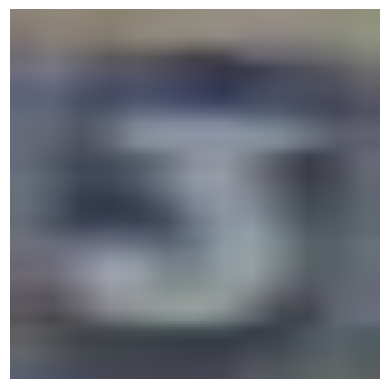

In [19]:
img = tf.io.read_file("train_singles/4_3.png")
img = tf.image.decode_png(img, channels=3)

# Resize and normalize
img = tf.image.resize(img, (128, 128))  # Resize the image
img = Rescaling(scale=1./127.5, offset=-1)(img)
img_display = (img + 1) / 2

plt.imshow(img_display.numpy())
plt.axis('off')  # Turn off axis labels
plt.show()